In [9]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dirr = 'C:/Users/shic/Desktop/shinhan_simon/google_drive/crawler_data/'

In [56]:
kbland = pd.read_csv(dirr+'kbland/kbland_bind_preprocessed.csv')
kbland['BASE_YM'] = pd.to_datetime(kbland['BASE_YM'],format='%Y%m')
kbland = kbland[kbland['SIDONM'].isin(['인천광역시'])]
kbland

,BASE_YM,SIDONM,SIGNGU_NM,WK_NO,TRDE_PRICE_CHNG_RT,TRDE_PRICE_INDX,TRDE_DEAL_INDX,BUY_ADVAN_INDX
19600,2011-02-01,인천광역시,중구,9,0.00,105.0,22.5,20.6
19601,2011-03-01,인천광역시,중구,10,0.09,105.1,18.8,14.9
19602,2011-03-01,인천광역시,중구,11,0.09,104.9,14.8,12.1
19603,2011-03-01,인천광역시,중구,12,-0.16,104.8,10.4,9.9
19604,2011-03-01,인천광역시,중구,13,-0.09,104.8,9.9,13.9
...,...,...,...,...,...,...,...,...
8790410,2021-05-01,인천광역시,서구,22,0.37,123.9,29.3,115.3
8790411,2021-06-01,인천광역시,서구,23,0.69,124.7,27.2,119.6
8790412,2021-06-01,인천광역시,서구,24,0.58,125.4,20.8,119.3
8790413,2021-06-01,인천광역시,서구,25,0.37,125.9,29.2,119.5


In [49]:
auction = pd.read_csv(dirr+'court/RAA_법원경매통계_유승훈.csv')
#auction = auction[auction['ACTN_THNG_PRPS_SCLAS_CODE']== 0]
auction = auction[auction['ACTN_THNG_PRPS_BCLAS_CODE'].isin([1])]
auction = auction[auction['SIDONM'].isin(['인천광역시'])]
auction['BASE_YM'] = pd.to_datetime(auction['BASE_YM'],format='%Y%m')
auction

,ACTN_THNG_PRPS_BCLAS_CODE,ACTN_THNG_PRPS_SCLAS_CODE,SIDONM,SIGNGU_NM,BASE_YM,ACTN_ITMN,DISP_ITMN,ESTM_PRICE,DISP_PRICE,DISP_RT,DISP_VLUE_RT
477825,1,0,인천광역시,강화군,2012-01-01,3.0,0.0,0.000000e+00,0.000000e+00,0.000,0.000
477826,1,0,인천광역시,강화군,2012-02-01,1.0,1.0,1.600000e+08,1.333000e+08,1.000,0.833
477827,1,0,인천광역시,강화군,2012-03-01,0.0,0.0,0.000000e+00,0.000000e+00,0.000,0.000
477828,1,0,인천광역시,강화군,2012-04-01,2.0,0.0,0.000000e+00,0.000000e+00,0.000,0.000
477829,1,0,인천광역시,강화군,2012-05-01,3.0,1.0,1.800000e+08,1.580000e+08,0.333,0.878
...,...,...,...,...,...,...,...,...,...,...,...
479200,1,0,인천광역시,중구,2021-03-01,6.0,5.0,1.181000e+09,1.155503e+09,0.833,0.978
479201,1,0,인천광역시,중구,2021-04-01,3.0,1.0,1.600000e+08,1.753000e+08,0.333,1.096
479202,1,0,인천광역시,중구,2021-05-01,4.0,3.0,5.910000e+08,5.970108e+08,0.750,1.010
479203,1,0,인천광역시,중구,2021-06-01,4.0,3.0,9.070000e+08,1.149863e+09,0.750,1.268


<AxesSubplot:xlabel='BASE_YM', ylabel='TRDE_PRICE_INDX'>

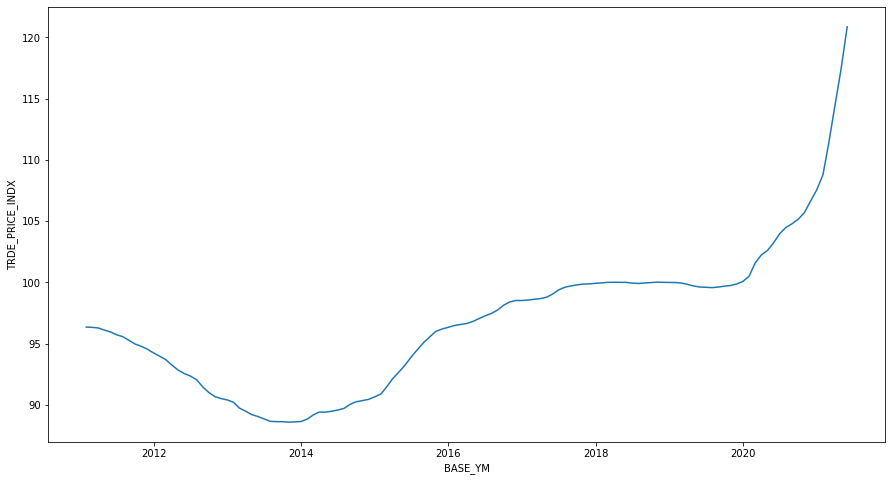

In [61]:
plt.figure(figsize=(15,8));
sns.lineplot(data=kbland,x='BASE_YM',y='TRDE_PRICE_INDX',ci=None)

<AxesSubplot:xlabel='BASE_YM', ylabel='DISP_VLUE_RT'>

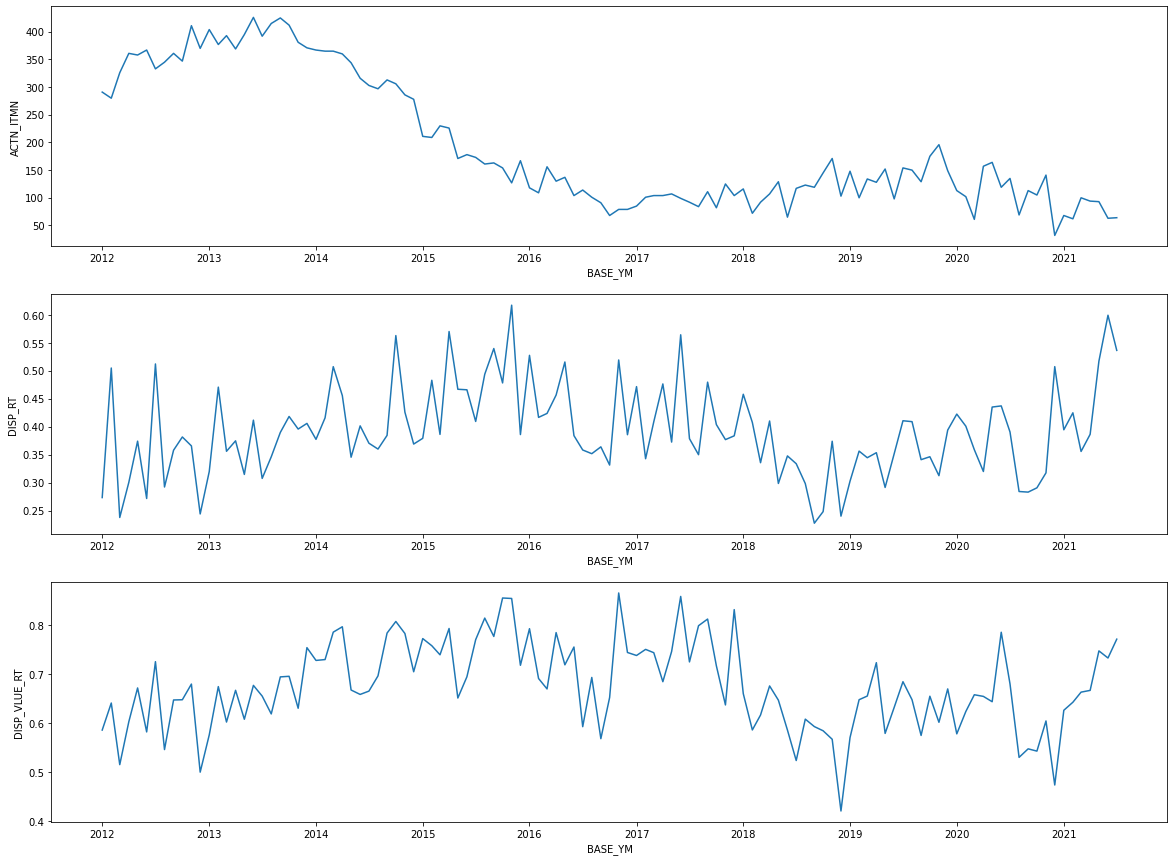

In [63]:
fig,ax = plt.subplots(3,1,figsize=(20,15));
sns.lineplot(data=auction,x='BASE_YM',y='ACTN_ITMN',ci=None,ax=ax[0],estimator='sum')
sns.lineplot(data=auction,x='BASE_YM',y='DISP_RT',ci=None,ax=ax[1],estimator='mean')
sns.lineplot(data=auction,x='BASE_YM',y='DISP_VLUE_RT',ci=None,ax=ax[2],estimator='mean')

In [52]:
auction['ACTN_THNG_PRPS_BCLAS_CODE'].unique()

array([1], dtype=int64)

In [53]:
auction['ACTN_THNG_PRPS_SCLAS_CODE'].unique()

array([0], dtype=int64)

In [68]:
auction[auction['BASE_YM']=='2021-07-01']

,ACTN_THNG_PRPS_BCLAS_CODE,ACTN_THNG_PRPS_SCLAS_CODE,SIDONM,SIGNGU_NM,BASE_YM,ACTN_ITMN,DISP_ITMN,ESTM_PRICE,DISP_PRICE,DISP_RT,DISP_VLUE_RT
477939,1,0,인천광역시,강화군,2021-07-01,2.0,0.0,0.000000e+00,0.000000e+00,0.0000,0.0000
478054,1,0,인천광역시,계양구,2021-07-01,4.0,4.0,9.540000e+08,1.153528e+09,1.0000,1.2090
478169,1,0,인천광역시,남구,2021-07-01,0.0,0.0,0.000000e+00,0.000000e+00,0.0000,0.0000
478284,1,0,인천광역시,남동구,2021-07-01,14.0,11.0,3.715000e+09,4.050126e+09,0.7860,1.0900
478399,1,0,인천광역시,동구,2021-07-01,3.0,3.0,5.830000e+08,7.023890e+08,1.0000,1.2050
478514,1,0,인천광역시,미추홀구,2021-07-01,9.0,5.0,9.900000e+08,1.201313e+09,0.5560,1.2130
478629,1,0,인천광역시,부평구,2021-07-01,6.0,3.0,6.830000e+08,6.656303e+08,0.5000,0.9740
478744,1,0,인천광역시,북구,2021-07-01,0.0,0.0,0.000000e+00,0.000000e+00,0.0000,0.0000
478859,1,0,인천광역시,서구,2021-07-01,12.0,8.0,1.819000e+09,2.248815e+09,0.6670,1.2360
478974,1,0,인천광역시,연수구,2021-07-01,11.0,10.0,4.881000e+09,6.262080e+09,0.9285,1.3205
